In [420]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# 라이브러리 임포트
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:

# 라이브러리 임포트
# pandas: 데이터 분석 및 처리 라이브러리
import pandas as pd
# 라이브러리 임포트
# numpy: 수치 계산과 배열 연산을 위한 라이브러리
import numpy as np

In [ ]:

# CSV 파일 로드
# CSV 파일을 데이터프레임으로 불러오기
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
# CSV 파일 로드
# CSV 파일을 데이터프레임으로 불러오기
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
# CSV 파일 로드
# CSV 파일을 데이터프레임으로 불러오기
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [423]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [424]:
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [425]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:

# 라이브러리 임포트
import random
np.random.seed(1234) 
random.seed(1234) 

In [ ]:
# 데이터프레임의 (행, 열) 구조 확인
print(train_df.shape)
# 데이터프레임의 (행, 열) 구조 확인
print(test_df.shape)

(891, 12)
(418, 11)


In [ ]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [ ]:
# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
train_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [430]:
# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
# 각 컬럼의 데이터 타입 확인
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# 수치형 데이터의 요약 통계량 출력
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [433]:
# 수치형 데이터의 요약 통계량 출력
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# 특정 범주형 컬럼에서 값의 빈도 확인
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
# 특정 범주형 컬럼에서 값의 빈도 확인
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# 특정 범주형 컬럼에서 값의 빈도 확인
train_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [ ]:
# 결측치 확인
# 결측값(null) 개수 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [438]:
# 결측치 확인
# 결측값(null) 개수 확인
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# 라이브러리 임포트
# matplotlib: 시각화 라이브러리, 주로 2D 그래프 그리기
import matplotlib.pyplot as plt
# 라이브러리 임포트
# seaborn: 고급 통계 그래프를 위한 시각화 라이브러리
import seaborn as sns

# 시각화
# 데이터 시각화 작업
plt.style.use("ggplot")

In [ ]:
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [ ]:
# 결측값을 포함한 행 제거
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [ ]:
# 그룹별 집계
# 결측값을 포함한 행 제거
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [ ]:
# 그룹별 집계
# 결측값을 포함한 행 제거
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

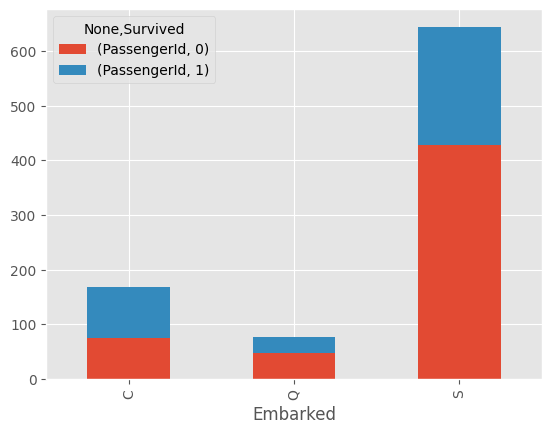

In [ ]:
# 시각화
# 데이터 시각화 작업
embarked_df.plot.bar(stacked=True)

In [ ]:
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<Axes: xlabel='Sex'>

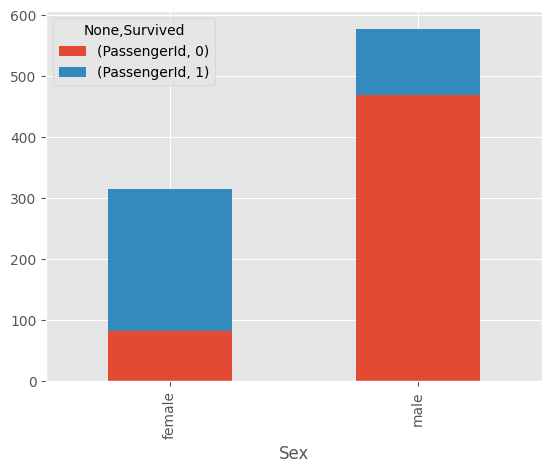

In [ ]:
# 그룹별 집계
# 결측값을 포함한 행 제거
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
# 시각화
# 데이터 시각화 작업
sex_df.plot.bar(stacked=True)

<Axes: xlabel='Pclass'>

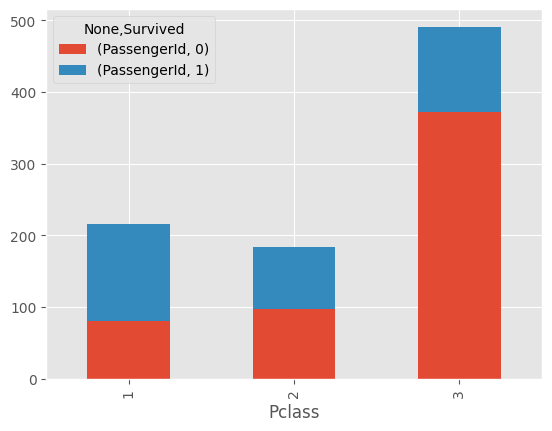

In [ ]:
# 그룹별 집계
# 결측값을 포함한 행 제거
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
# 시각화
# 데이터 시각화 작업
ticket_df.plot.bar(stacked=True)

<Axes: xlabel='Age'>

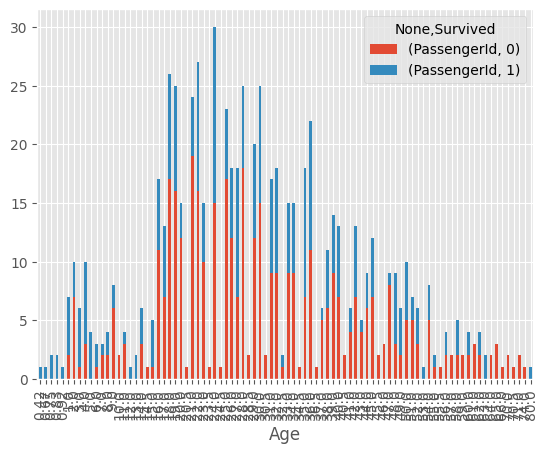

In [ ]:
# 그룹별 집계
# 결측값을 포함한 행 제거
age_df = train_df[["Age", "Survived", "PassengerId"]].dropna().groupby(["Age", "Survived"]).count().unstack()
# 시각화
# 데이터 시각화 작업
age_df.plot.bar(stacked=True)

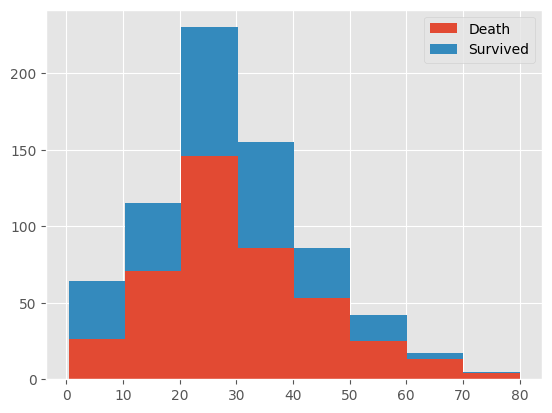

In [ ]:
# 시각화
# 데이터 시각화 작업
plt.hist(x=[train_df.Age[train_df.Survived == 0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"])
# 시각화
# 데이터 시각화 작업
plt.legend()

In [ ]:
# 범주형 데이터를 One-Hot Encoding 방식으로 변환
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
# 범주형 데이터를 One-Hot Encoding 방식으로 변환
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


In [ ]:
# 각 컬럼의 데이터 타입 확인
train_corr = train_df_corr.select_dtypes(include=["number", "bool"]).corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

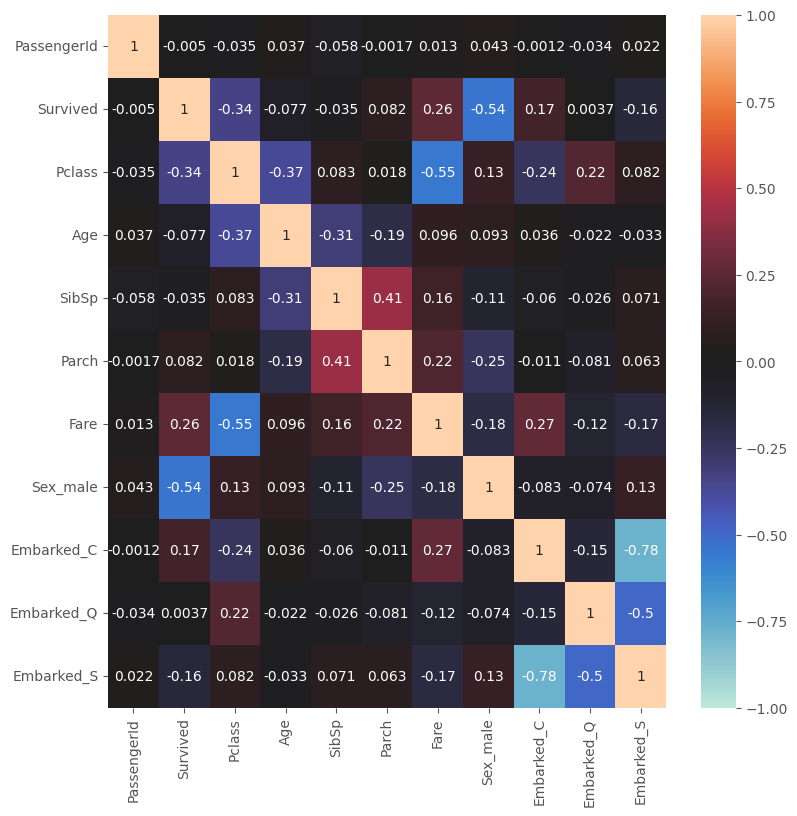

In [ ]:
# 시각화
# 데이터 시각화 작업
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

In [ ]:
# 컬럼 또는 행 삭제
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 결측치 확인
# 결측값(null) 개수 확인
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# 그룹별 집계
# 특정 컬럼 기준 그룹화 후 통계 계산
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

Fare_mean.columns = ["Pclass", "Fare_mean"]

Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [ ]:
# 두 데이터프레임 병합
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")

# 결측치 확인
# 결측값(null) 개수 확인
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]

# 컬럼 또는 행 삭제
all_df = all_df.drop("Fare_mean", axis=1)

In [ ]:
# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
name_df = all_df["Name"].str.split("[,.]", n = 2, expand=True)

name_df.columns = ["family_name", "honorific", "name"]

name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [ ]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [ ]:
# 특정 범주형 컬럼에서 값의 빈도 확인
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [ ]:
all_df = pd.concat([all_df, name_df], axis=1)

all_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

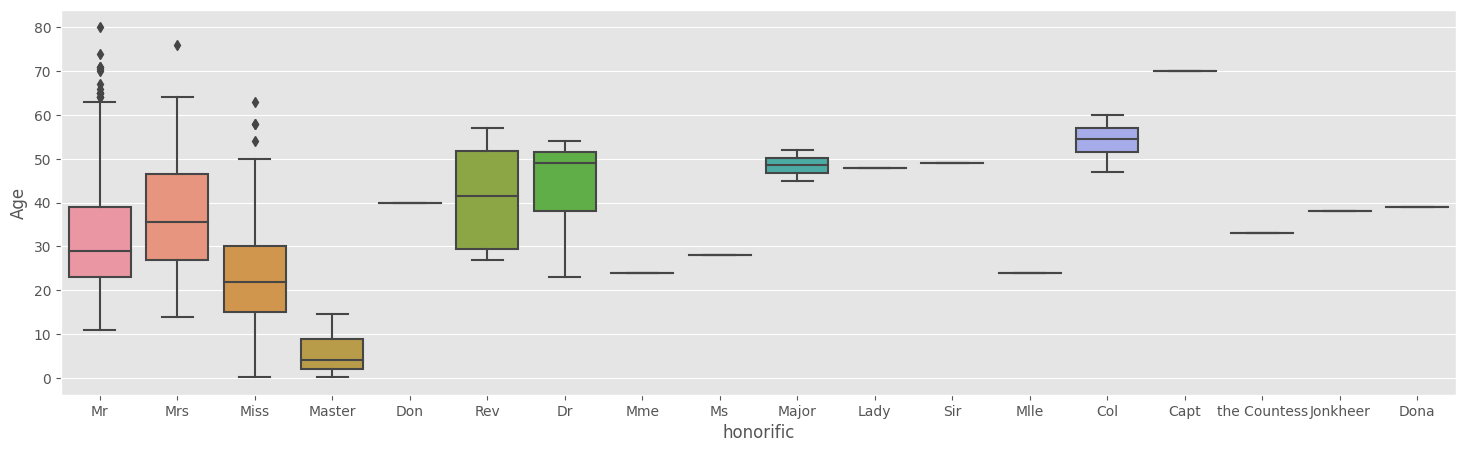

In [ ]:
# 시각화
# 데이터 시각화 작업
plt.figure(figsize=(18, 5))
# 시각화
# 데이터 시각화 작업
sns.boxplot(x="honorific", y="Age", data=all_df)

In [ ]:
# 컬럼 또는 행 삭제
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):]])

<Axes: xlabel='honorific'>

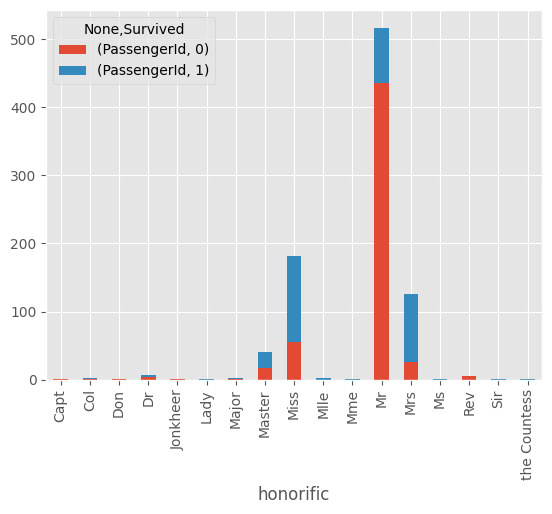

In [ ]:
# 그룹별 집계
# 결측값을 포함한 행 제거
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
# 시각화
# 데이터 시각화 작업
honorific_df.plot.bar(stacked=True)

In [ ]:
# 그룹별 집계
# 특정 컬럼 기준 그룹화 후 통계 계산
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()

honorific_age_mean.columns = ["honorific", "honorific_Age"]

# 두 데이터프레임 병합
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")

# 결측치 확인
# 결측값(null) 개수 확인
all_df.loc[all_df["Age"].isnull(), "Age"] = all_df["honorific_Age"]

# 컬럼 또는 행 삭제
all_df = all_df.drop(["honorific_Age"], axis=1)

In [ ]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
# 특정 범주형 컬럼에서 값의 빈도 확인
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [ ]:
# 컬럼 또는 행 삭제
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis = 1)

# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0


In [ ]:
# 각 컬럼의 데이터 타입 확인
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [ ]:
all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mr") | (all_df["honorific"]=="Master")), "honorific"] = "other"

# 특정 범주형 컬럼에서 값의 빈도 확인
all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
other     231
Master     61
Name: count, dtype: int64

In [470]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 결측값 채우기
all_df["Embarked"].fillna("missing", inplace=True)
# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
all_df.head()

/tmp/ipykernel_36/4248844416.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["Embarked"].fillna("missing", inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,female,38.0,1,0,71.2833,C,other,1
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,female,35.0,1,0,53.1000,S,other,1
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0


In [ ]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,1,22.0,1,0,7.2500,S,Mr,1
1,1.0,1,0,38.0,1,0,71.2833,C,other,1
2,1.0,3,0,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,0,35.0,1,0,53.1000,S,other,1
4,0.0,3,1,35.0,0,0,8.0500,S,Mr,0


In [ ]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
# 각 컬럼의 데이터 타입 확인
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

# 데이터 미리보기
# 데이터 상위 5행 출력 (미리보기)
all_df.head()

Sex
Embarked
honorific


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num
0,0.0,3,1,22.0,1,0,7.2500,2,2,1
1,1.0,1,0,38.0,1,0,71.2833,0,3,1
2,1.0,3,0,26.0,0,0,7.9250,2,1,0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1
4,0.0,3,1,35.0,0,0,8.0500,2,2,0


In [ ]:
# 결측치 확인
# 결측값(null) 개수 확인
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

train_Y = train_df["Survived"]

# 결측치 확인
# 결측값(null) 개수 확인
test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

In [475]:
# 라이브러리 임포트
import lightgbm as lgb
# 학습/검증 데이터 분할
# 학습용 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
# K-Fold 교차 검증 설정
from sklearn.model_selection import KFold

In [ ]:
# 학습/검증 데이터 분할
# 학습용 데이터와 테스트 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2) 

In [ ]:
categories = ["Embarked", "Pclass", "Sex", "honorific"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [ ]:
lgbm_params = {
    "objective":"binary",
    "random_seed":1234
}

In [ ]:
# LightGBM 모델 학습 수행
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_eval],
                      callbacks=[ 
                          lgb.early_stopping(stopping_rounds=20),
                          lgb.log_evaluation(period=10)
                      ]
)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [ ]:
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19], dtype=int32)

<Axes: >

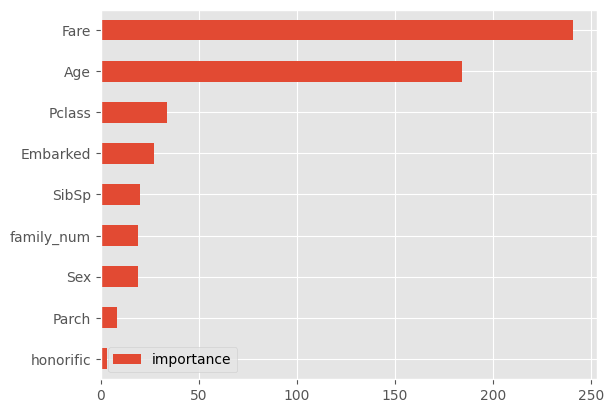

In [ ]:
# 라이브러리 임포트
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
# 라이브러리 임포트
# 데이터 시각화 작업
importance.plot.barh()

In [ ]:
# 예측 수행
# 모델로 예측 실행
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [483]:
# 예측 결과 정확도 평가
from sklearn.metrics import accuracy_score

In [ ]:
# 예측 결과 정확도 평가
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

In [ ]:
lgbm_params = {
    "objective": "binary",
    "learning_rate": 0.05,
    "random_seed": 1234
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [ ]:
# LightGBM 모델 학습 수행
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_eval],
                      callbacks=[
                          lgb.early_stopping(stopping_rounds=20),
                          lgb.log_evaluation(period=10)
                      ]
)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [ ]:
model_lgb.feature_importance()

array([ 66,  37, 384,  40,  19, 497,  58,   8,  39], dtype=int32)

<Axes: >

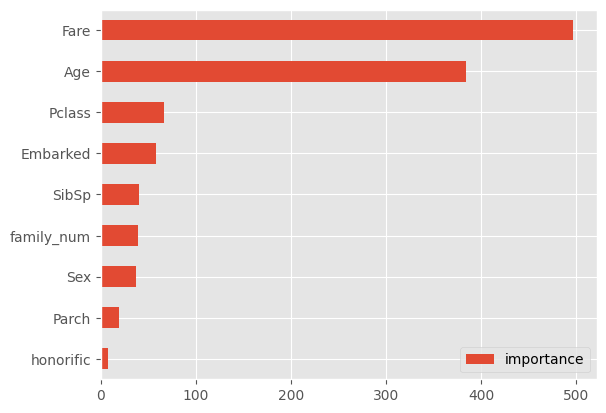

In [ ]:
# 라이브러리 임포트
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
# 라이브러리 임포트
# 데이터 시각화 작업
importance.plot.barh()

In [ ]:
# 예측 수행
# 모델로 예측 실행
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [ ]:
# 예측 결과 정확도 평가
accuracy_score(y_valid, np.round(y_pred))

0.8491620111731844

In [ ]:
folds = 3
# K-Fold 교차 검증 설정
kf = KFold(n_splits=folds)

In [ ]:
accuracy_list = []

models = []
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

# LightGBM 모델 학습 수행
    model_lgb = lgb.train(
        lgbm_params,
        lgb_train,
        num_boost_round=100,
        valid_sets=[lgb_eval],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(period=10)
        ]
    )

# 예측 수행
# 모델로 예측 실행
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
# 예측 결과 정확도 평가
    acc = accuracy_score(y_valid, np.round(y_pred))
    print("Fold accuracy:", acc)
    accuracy_list.append(acc)

    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [ ]:
mean_accuracy = np.mean(accuracy_list)
print("Average Cross-Validation Accuracy:", mean_accuracy)

Average Cross-Validation Accuracy: 0.8350168350168351


In [ ]:
preds = []

for model in models:
# 예측 수행
# 모델로 예측 실행
    pred = model.predict(test_X)
    preds.append(pred)

In [ ]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [ ]:
preds_int = (preds_mean > 0.5).astype(int)

In [ ]:
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv("titanic_submit01.csv", index=False)